In [8]:
# !wget https://archive.ics.uci.edu/static/public/275/bike+sharing+dataset.zip


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# !unzip bike+sharing+dataset.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('hour.csv')

In [4]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [5]:
feature_names = df.columns.tolist()
print("Feature Names:", feature_names)

Feature Names: ['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [6]:
df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')

In [7]:
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)


In [8]:
df['dteday'] = pd.to_datetime(df.dteday)


In [9]:
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)

In [10]:
# Separating features and target variable
X = df.drop(columns=['cnt']) # Features
y = df['cnt'] # Target

In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

In [12]:
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])


In [13]:
X[numerical_features]= numerical_pipeline.fit_transform(X[numerical_features])

In [14]:
categorical_features = ['season', 'weathersit', 'day_night']
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse_output=False,drop = 'first'))
])

In [15]:
X_encoded = categorical_pipeline.fit_transform(X[categorical_features])

In [16]:
X_encoded = pd.DataFrame(X_encoded, columns=categorical_pipeline.named_steps['onehot'].get_feature_names_out(categorical_features))

In [17]:
X= pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
feat_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns,
columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

<Axes: >

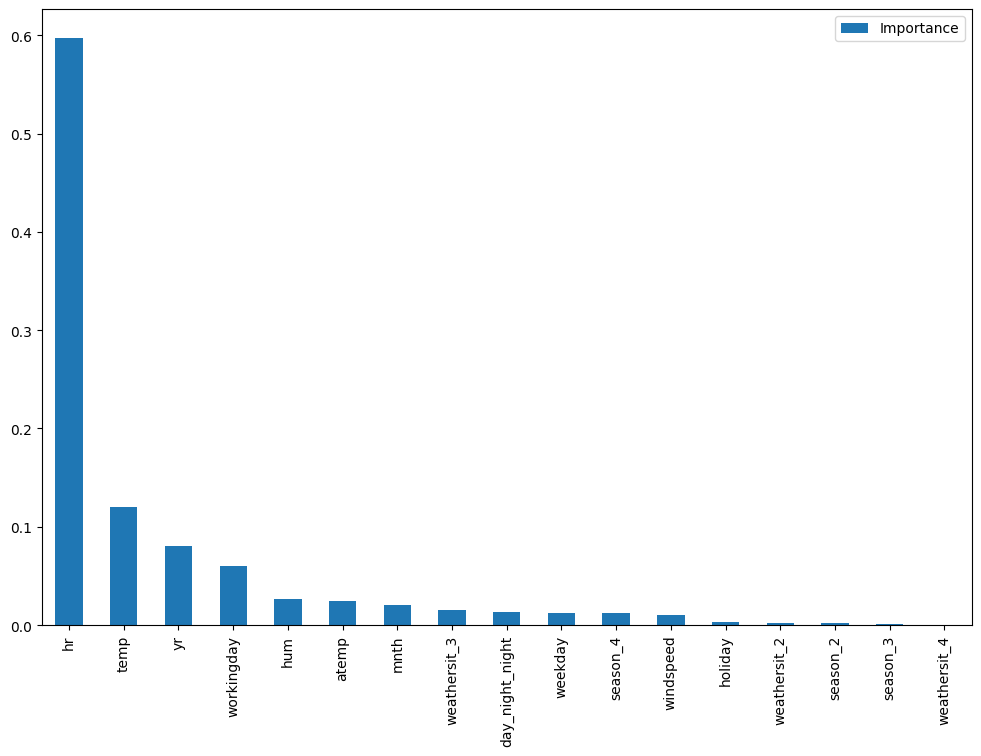

In [23]:
feat_importances.plot(kind='bar', figsize=(12,8))

In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)

In [26]:
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1808.4074990292243
R-squared: 0.9428901308176855


In [27]:
final_pipline = Pipeline([
    ('numerical_pipeline', numerical_pipeline),
    ('categorical_pipeline', categorical_pipeline),

    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [28]:
from sklearn import set_config

In [29]:
set_config(display='diagram')# To display
final_pipline

Pipeline(steps=[('numerical_pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('categorical_pipeline',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='most_frequent')),
                                 ('onehot',
                                  OneHotEncoder(drop='first',
                                                sparse_output=False))])),
                ('model', RandomForestRegressor(random_state=42))])

In [35]:
pip install category_encoders

   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   -------------------- ------------------- 41.0/81.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn import set_config


In [33]:
df['temp_hum'] = df['temp'] * df['hum']
df['temp_windspeed'] = df['temp'] * df['windspeed']


In [37]:

df = pd.read_csv('hour.csv')


df['day_night'] = df['hr'].apply(lambda x: 'day' if 6 <= x <= 18 else 'night')
df.drop(['instant', 'casual', 'registered'], axis=1, inplace=True)
df['dteday'] = pd.to_datetime(df.dteday)
df['season'] = df.season.astype('category')
df['holiday'] = df.holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weathersit'] = df.weathersit.astype('category')
df['workingday'] = df.workingday.astype('category')
df['mnth'] = df.mnth.astype('category')
df['yr'] = df.yr.astype('category')
df['hr'] = df.hr.astype('category')
df.drop(columns=['dteday'], inplace=True)

X = df.drop(columns=['cnt'])  # Features
y = df['cnt']  # Target



In [38]:

X['temp_hum'] = X['temp'] * X['hum']
X['temp_windspeed'] = X['temp'] * X['windspeed']




In [39]:

categorical_features = ['season', 'weathersit', 'day_night']


target_encoder = ce.TargetEncoder(cols=categorical_features)
X_encoded = target_encoder.fit_transform(X, y)


X = pd.concat([X.drop(columns=categorical_features), X_encoded], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:

linear_model_package = LinearRegression()
linear_model_package.fit(X_train, y_train)


y_pred_package = linear_model_package.predict(X_test)


mse_package = mean_squared_error(y_test, y_pred_package)
r2_package = r2_score(y_test, y_pred_package)

print(f'Mean Squared Error (Package): {mse_package}')
print(f'R-squared (Package): {r2_package}')


Mean Squared Error (Package): 14974.133860641094
R-squared (Package): 0.5271138687719741


In [42]:

alpha = 1e-5


X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]


I = np.eye(X_train_b.shape[1])  
I[0, 0] = 0  
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b) + alpha * I).dot(X_train_b.T).dot(y_train)


y_pred_scratch = X_test_b.dot(theta_best)


mse_scratch = mean_squared_error(y_test, y_pred_scratch)
r2_scratch = r2_score(y_test, y_pred_scratch)

print(f'Mean Squared Error (Scratch with Regularization): {mse_scratch}')
print(f'R-squared (Scratch with Regularization): {r2_scratch}')


Mean Squared Error (Scratch with Regularization): 14974.07889052167
R-squared (Scratch with Regularization): 0.5271156047392994


In [43]:

final_pipeline = Pipeline([
    ('num_preprocess', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler())
    ])),
    ('target_encoder', target_encoder),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


set_config(display='diagram')
final_pipeline


Pipeline(steps=[('num_preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', MinMaxScaler())])),
                ('target_encoder',
                 TargetEncoder(cols=['season', 'weathersit', 'day_night'])),
                ('model', RandomForestRegressor(random_state=42))])